# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | nova sintra
Processing Record 3 of Set 1 | susuman
Processing Record 4 of Set 1 | vadso
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | itamaraca
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | enewetak
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | viedma
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | haiku-pauwela
Processing Record 23 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,292.27,72,100,9.83,PN,1720385199
1,nova sintra,14.8667,-24.7167,298.65,80,43,2.93,CV,1720385200
2,susuman,62.7833,148.1667,283.65,76,22,2.06,RU,1720385202
3,vadso,70.0744,29.7487,287.64,88,75,1.54,NO,1720385203
4,port-aux-francais,-49.3500,70.2167,275.51,87,98,12.07,TF,1720385204


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,292.27,72,100,9.83,PN,1720385199
1,nova sintra,14.8667,-24.7167,298.65,80,43,2.93,CV,1720385200
2,susuman,62.7833,148.1667,283.65,76,22,2.06,RU,1720385202
3,vadso,70.0744,29.7487,287.64,88,75,1.54,NO,1720385203
4,port-aux-francais,-49.3500,70.2167,275.51,87,98,12.07,TF,1720385204


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

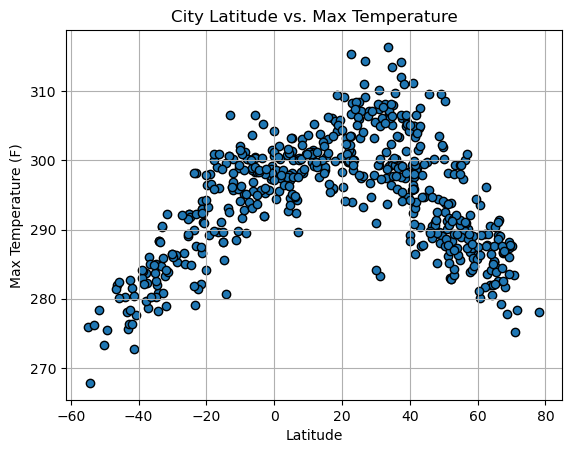

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

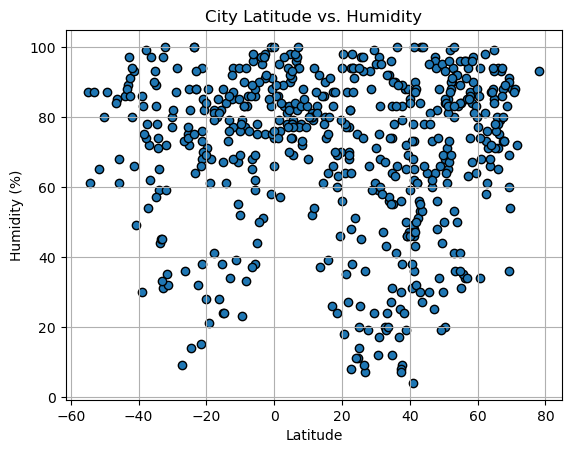

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

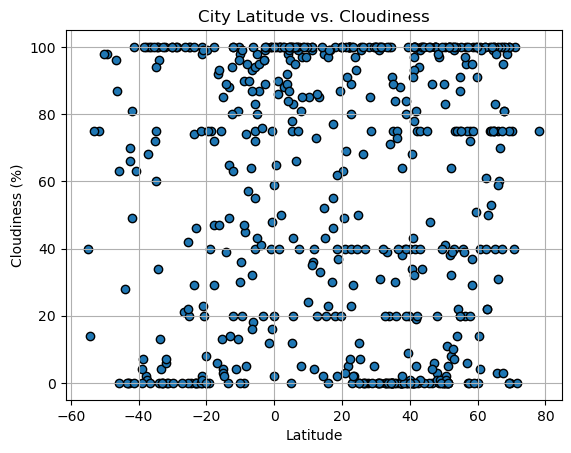

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

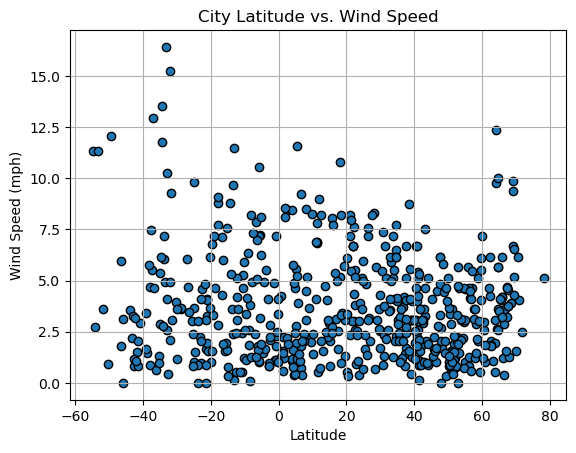

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_squared = rvalue**2

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(regress_values)), fontsize=15, color="red")
    plt.title(f"{hemisphere} Hemisphere - {title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.text(0.05, 0.05, f"$r^2 = {r_squared:.2f}$", transform=plt.gca().transAxes, fontsize=15, color="blue")
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nova sintra,14.8667,-24.7167,298.65,80,43,2.93,CV,1720385200
2,susuman,62.7833,148.1667,283.65,76,22,2.06,RU,1720385202
3,vadso,70.0744,29.7487,287.64,88,75,1.54,NO,1720385203
5,tura,25.5198,90.2201,297.50,97,100,1.64,IN,1720385205
7,iqaluit,63.7506,-68.5145,282.00,66,75,3.09,CA,1720385207


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,292.27,72,100,9.83,PN,1720385199
4,port-aux-francais,-49.3500,70.2167,275.51,87,98,12.07,TF,1720385204
6,ushuaia,-54.8000,-68.3000,275.96,87,40,11.32,AR,1720385206
8,port saint john's,-31.6229,29.5448,292.24,35,0,9.29,ZA,1720385209
12,itamaraca,-7.7478,-34.8256,300.18,86,57,4.93,BR,1720385213


###  Temperature vs. Latitude Linear Regression Plot

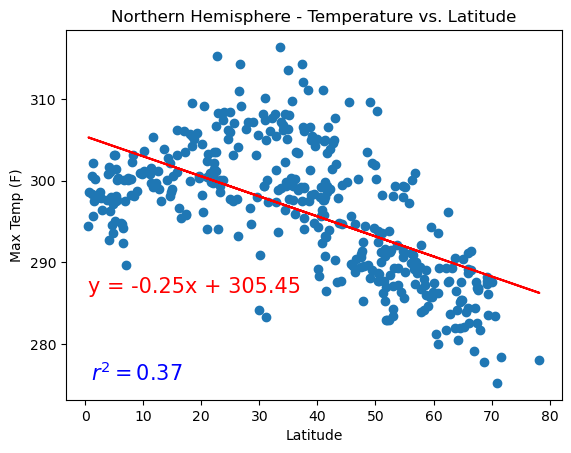

In [28]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Temperature vs. Latitude", "Latitude", "Max Temp (F)", "Northern")

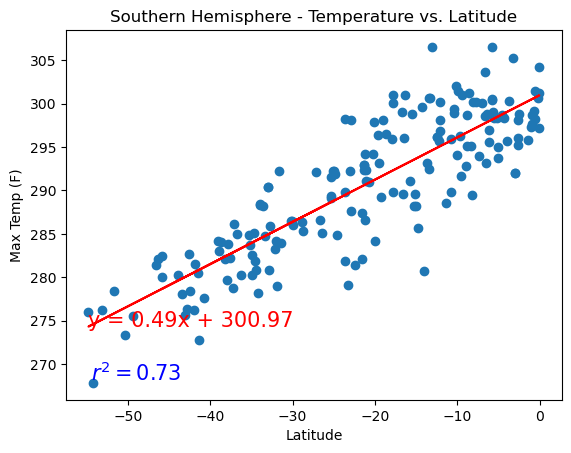

In [29]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Temperature vs. Latitude", "Latitude", "Max Temp (F)", "Southern")

**Discussion about the linear relationship:** with the moderate to moderately-high r^2, latitude is a fairly good indicator of the
tempurature. The regression is a more accurate predictor in the Southern hemisphere relative to the Northern

### Humidity vs. Latitude Linear Regression Plot

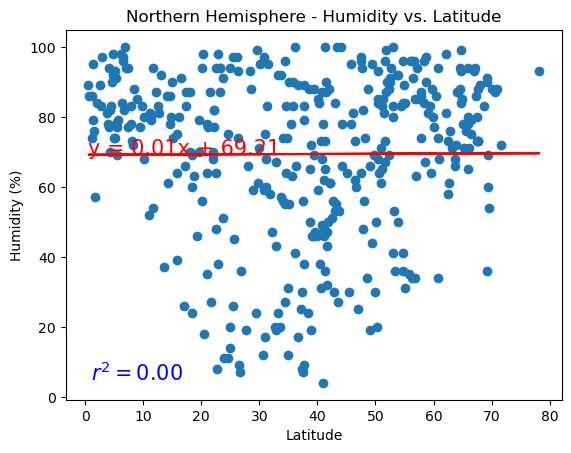

In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern")

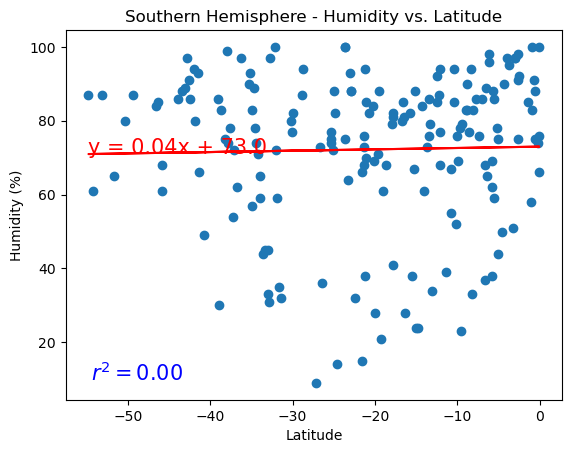

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern")


**Discussion about the linear relationship:** Given the low r^2 and the visuals of the scatter plot, the relationship
between humidity and latitude is low. One is not a good indicator of the other. 

### Cloudiness vs. Latitude Linear Regression Plot

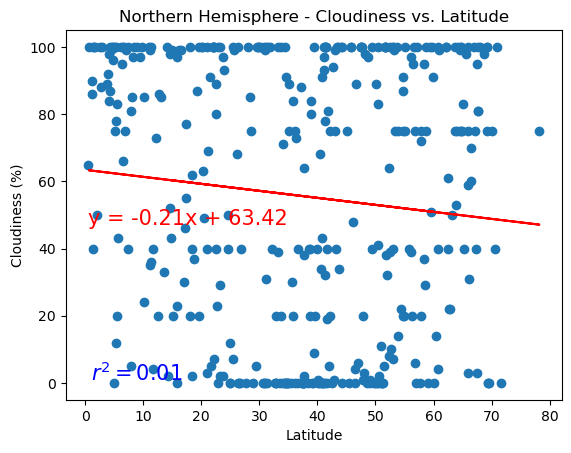

In [32]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern")

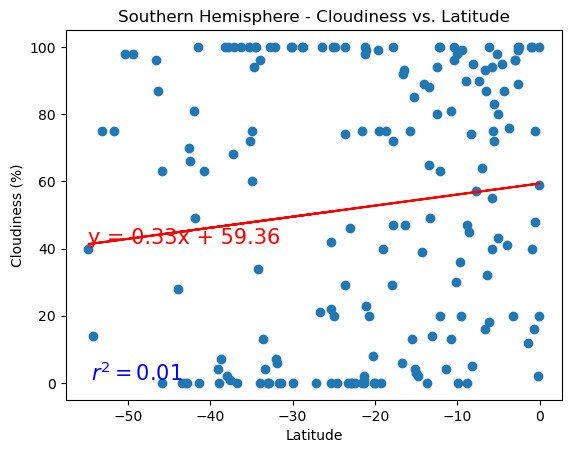

In [33]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern")

**Discussion about the linear relationship:** Given the low r^2 and the visuals of the scatter plot, the relationship
between cloudiness and latitude is low. One is not a good indicator of the other. 

### Wind Speed vs. Latitude Linear Regression Plot

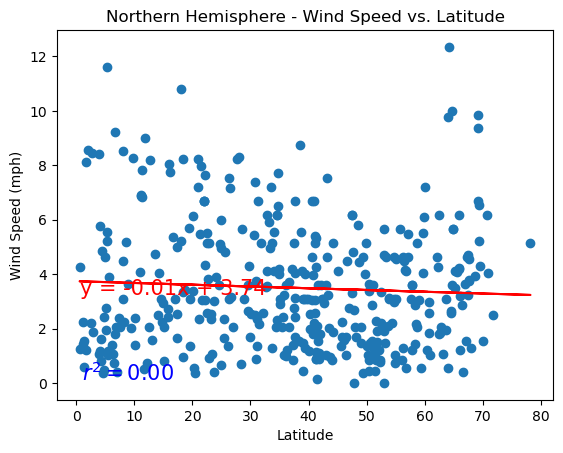

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Northern")

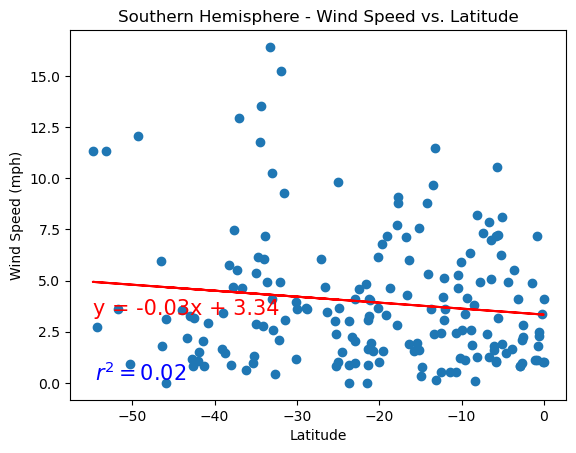

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Southern")

**Discussion about the linear relationship:** Given the low r^2 and the visuals of the scatter plot, the relationship
between wind speed and latitude is low. One is not a good indicator of the other. 